In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
#import mathplotlib

In [2]:

data_crawling = pd.read_csv ('data_from_crawling.csv')
print (data_crawling)



            Date Avocado A Avocado B Banana A Banana B Carrot A Carrot B  \
0     01.01.2016       NaN       NaN      NaN      NaN      NaN      NaN   
1     02.01.2016       NaN       NaN      NaN      NaN      NaN      NaN   
2     03.01.2016       7.6       8.1      2.9      NaN      2.7      NaN   
3     04.01.2016       7.5      10.7      2.9      NaN      2.7      NaN   
4     05.01.2016       8.8       9.6      2.9      NaN      2.6      NaN   
...          ...       ...       ...      ...      ...      ...      ...   
1867  22.12.2021         3      6.04        2     3.67      2.5        5   
1868  23.12.2021         4      5.88      2.5     3.31      2.5        5   
1869  24.12.2021       NaN       NaN      NaN      NaN      NaN      NaN   
1870  25.12.2021       NaN       NaN      NaN      NaN      NaN      NaN   
1871  26.12.2021       4.1      6.04      NaN     3.62     2.45      5.3   

     Cucumber A  Cucumber B Green Apple A  ... Red Cabbage A  Red Cabbage B  \
0       

###### We remove all the rows that have missing values

In [3]:
df2=data_crawling.dropna(axis=0, thresh=20).copy()
#df2=df2.str.replace('*','')
for i in df2.columns:
    if(df2[i].dtype == 'O'):
        df2[i]=df2[i].str.replace('*','')

for i in df2.columns:
    if(i == 'Date'):
        continue
    else:df2[i].astype(float)
    
    



<ipython-input-3-d90a42fa82a7>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2[i]=df2[i].str.replace('*','')


df2.fillna(method='ffill')

In [48]:
df2 

,Date,Avocado A,Avocado B,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,...,Red Cabbage A,Red Cabbage B,Red Pepper A,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B
2,03.01.2016,7.60,8.10,2.90,NaN,2.70,NaN,4.60,5.1,NaN,...,6.00,6.1,8.00,8.10,2.70,NaN,9.1,10.10,6.40,7.50
3,04.01.2016,7.50,10.70,2.90,NaN,2.70,NaN,4.10,4.4,NaN,...,6.00,6.5,8.20,8.80,2.00,NaN,NaN,9.90,6.90,7.30
4,05.01.2016,8.80,9.60,2.90,NaN,2.60,NaN,3.20,4.4,NaN,...,5.90,6.2,6.60,7.90,2.40,NaN,10.0,10.20,7.30,7.50
5,06.01.2016,8.80,10.10,2.80,NaN,2.90,NaN,3.50,4.0,5.3,...,5.50,5.7,7.00,7.60,2.10,NaN,8.0,8.40,7.00,7.10
6,07.01.2016,9.10,10.80,2.80,NaN,2.80,NaN,3.50,4.9,NaN,...,5.40,5.4,4.90,7.70,2.60,NaN,7.7,8.00,6.00,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,3.00,5.65,2.22,3.49,2.67,4.0,5.89,NaN,NaN,...,2.10,NaN,3.17,5.68,3.00,5.0,3.0,4.50,3.00,5.75
1866,21.12.2021,3.33,5.85,2.00,3.47,2.50,5.0,6.36,NaN,NaN,...,2.46,NaN,3.00,5.63,2.95,5.0,NaN,4.50,3.25,6.00
1867,22.12.2021,3.00,6.04,2.00,3.67,2.50,5.0,6.21,NaN,NaN,...,2.50,NaN,3.00,5.86,3.00,5.0,3.0,4.50,3.00,6.06
1868,23.12.2021,4.00,5.88,2.50,3.31,2.50,5.0,5.92,NaN,NaN,...,2.28,NaN,3.70,5.27,2.95,5.0,NaN,5.06,3.38,5.25


In [49]:
df2.to_csv('df_for_regression_logistic.csv', index=False)

In [5]:
df2['Avocado A'] = pd.to_numeric(df2['Avocado A'],errors = 'coerce')
for i in df2.columns:
    if(i != "Date"):
        df2[i] = pd.to_numeric(df2[i],errors = 'coerce')

In [6]:
df2.info()
p_df = df2.copy()
colNameArray = ['Date','Avocado A','Avocado B','Banana A','Banana B','Carrot A','Carrot B','Cucumber A','Cucumber B','Green Apple A','Green Apple B','Green Cabbage A','Green Cabbage B','Lemon A','Lemon B','Letture A','Letture B','Onion A','Onion B','Pear A','Pear B','Pomegranate A','Pomegranate B','Red Apple A','Red Apple B','Red Cabbage A','Red Cabbage B','Red Pepper A','Red Pepper B','Sweet-Potato A','Sweet-Potato B','Tomatoe A','Tomatoe B','Yellow Pepper A','Yellow Pepper B']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 2 to 1871
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1127 non-null   object 
 1   Avocado A        453 non-null    float64
 2   Avocado B        559 non-null    float64
 3   Banana A         971 non-null    float64
 4   Banana B         772 non-null    float64
 5   Carrot A         1119 non-null   float64
 6   Carrot B         717 non-null    float64
 7   Cucumber A       1127 non-null   float64
 8   Cucumber B       16 non-null     float64
 9   Green Apple A    523 non-null    float64
 10  Green Apple B    1126 non-null   float64
 11  Green Cabbage A  1127 non-null   float64
 12  Green Cabbage B  9 non-null      float64
 13  Lemon A          1011 non-null   float64
 14  Lemon B          1087 non-null   float64
 15  Letture A        1098 non-null   float64
 16  Letture B        0 non-null      float64
 17  Onion A       

In [7]:
#p_df['Banana A'].describe()
#curMean = p_df['Banana B'].mean() - p_df['Banana A'].mean()
#curMean
for i in range(1,len(p_df.columns)-1,2):
    A_col = df2[colNameArray[i]]
    B_col = df2[colNameArray[i+1]]
    if((A_col.count() > 900)):
        curMean = B_col.mean() - A_col.mean()
        curMean = round(curMean, 2)
        for j in range(0,len(p_df)-1):
            if((math.isnan(B_col.iloc[[j]]))):
                p_df[colNameArray[i+1]].iloc[[j]] = A_col.iloc[[j]] + curMean
            else:
                continue
        print(colNameArray[i])
        print(curMean)
##  and (math.isnan(A_col.iloc[[j]]))

C:\Users\963ga\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Banana A
0.22
Carrot A
1.16
Cucumber A
-0.14
Green Cabbage A
2.27
Lemon A
1.93
Letture A
nan
Red Cabbage A
2.61
Red Pepper A
2.49


In [8]:
p_df1 = p_df.copy() 
for i in range(2,len(p_df.columns),2):
    A_col = df2[colNameArray[i-1]]
    B_col = df2[colNameArray[i]]
    if((B_col.count() > 900)):
        curMean = B_col.mean() - A_col.mean()
        curMean = round(curMean, 2)
        print(colNameArray[i])
        print(colNameArray[i-1])
        for j in range(0,len(p_df)-1):
            if((math.isnan(A_col.iloc[[j]]))):
                p_df1[colNameArray[i-1]].iloc[[j]] = B_col.iloc[[j]] - curMean
            else:
                continue
       # print(colNameArray[i])
       #print(curMean)

Green Apple B
Green Apple A
Lemon B
Lemon A
Pear B
Pear A
Red Apple B
Red Apple A
Red Pepper B
Red Pepper A
Sweet-Potato B
Sweet-Potato A
Tomatoe B
Tomatoe A
Yellow Pepper B
Yellow Pepper A


In [9]:

p_df

,Date,Avocado A,Avocado B,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,...,Red Cabbage A,Red Cabbage B,Red Pepper A,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B
2,03.01.2016,7.60,8.10,2.90,3.12,2.70,3.86,4.60,5.10,NaN,...,6.00,6.10,8.00,8.10,2.70,NaN,9.1,10.10,6.40,7.50
3,04.01.2016,7.50,10.70,2.90,3.12,2.70,3.86,4.10,4.40,NaN,...,6.00,6.50,8.20,8.80,2.00,NaN,NaN,9.90,6.90,7.30
4,05.01.2016,8.80,9.60,2.90,3.12,2.60,3.76,3.20,4.40,NaN,...,5.90,6.20,6.60,7.90,2.40,NaN,10.0,10.20,7.30,7.50
5,06.01.2016,8.80,10.10,2.80,3.02,2.90,4.06,3.50,4.00,5.3,...,5.50,5.70,7.00,7.60,2.10,NaN,8.0,8.40,7.00,7.10
6,07.01.2016,9.10,10.80,2.80,3.02,2.80,3.96,3.50,4.90,NaN,...,5.40,5.40,4.90,7.70,2.60,NaN,7.7,8.00,6.00,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,3.00,5.65,2.22,3.49,2.67,4.00,5.89,5.75,NaN,...,2.10,4.71,3.17,5.68,3.00,5.0,3.0,4.50,3.00,5.75
1866,21.12.2021,3.33,5.85,2.00,3.47,2.50,5.00,6.36,6.22,NaN,...,2.46,5.07,3.00,5.63,2.95,5.0,NaN,4.50,3.25,6.00
1867,22.12.2021,3.00,6.04,2.00,3.67,2.50,5.00,6.21,6.07,NaN,...,2.50,5.11,3.00,5.86,3.00,5.0,3.0,4.50,3.00,6.06
1868,23.12.2021,4.00,5.88,2.50,3.31,2.50,5.00,5.92,5.78,NaN,...,2.28,4.89,3.70,5.27,2.95,5.0,NaN,5.06,3.38,5.25


In [10]:
p_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 2 to 1871
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1127 non-null   object 
 1   Avocado A        453 non-null    float64
 2   Avocado B        559 non-null    float64
 3   Banana A         971 non-null    float64
 4   Banana B         1126 non-null   float64
 5   Carrot A         1119 non-null   float64
 6   Carrot B         1126 non-null   float64
 7   Cucumber A       1127 non-null   float64
 8   Cucumber B       1126 non-null   float64
 9   Green Apple A    1125 non-null   float64
 10  Green Apple B    1126 non-null   float64
 11  Green Cabbage A  1127 non-null   float64
 12  Green Cabbage B  1126 non-null   float64
 13  Lemon A          1127 non-null   float64
 14  Lemon B          1127 non-null   float64
 15  Letture A        1098 non-null   float64
 16  Letture B        0 non-null      float64
 17  Onion A       

In [11]:
## dataframe after filling missing values and deleted empty columns  p_df2
p_df2 = p_df1.dropna(axis=1, thresh=800).copy()



In [12]:
p_df2

,Date,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,...,Red Cabbage A,Red Cabbage B,Red Pepper A,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B
2,03.01.2016,2.90,3.12,2.70,3.86,4.60,5.10,4.27,7.0,4.70,...,6.00,6.10,8.00,8.10,2.70,NaN,9.10,10.10,6.40,7.50
3,04.01.2016,2.90,3.12,2.70,3.86,4.10,4.40,4.77,7.5,5.00,...,6.00,6.50,8.20,8.80,2.00,NaN,8.19,9.90,6.90,7.30
4,05.01.2016,2.90,3.12,2.60,3.76,3.20,4.40,4.27,7.0,5.00,...,5.90,6.20,6.60,7.90,2.40,NaN,10.00,10.20,7.30,7.50
5,06.01.2016,2.80,3.02,2.90,4.06,3.50,4.00,5.30,6.8,4.40,...,5.50,5.70,7.00,7.60,2.10,NaN,8.00,8.40,7.00,7.10
6,07.01.2016,2.80,3.02,2.80,3.96,3.50,4.90,4.57,7.3,4.40,...,5.40,5.40,4.90,7.70,2.60,NaN,7.70,8.00,6.00,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,2.22,3.49,2.67,4.00,5.89,5.75,5.27,8.0,1.45,...,2.10,4.71,3.17,5.68,3.00,5.0,3.00,4.50,3.00,5.75
1866,21.12.2021,2.00,3.47,2.50,5.00,6.36,6.22,5.27,8.0,1.44,...,2.46,5.07,3.00,5.63,2.95,5.0,2.79,4.50,3.25,6.00
1867,22.12.2021,2.00,3.67,2.50,5.00,6.21,6.07,5.27,8.0,1.34,...,2.50,5.11,3.00,5.86,3.00,5.0,3.00,4.50,3.00,6.06
1868,23.12.2021,2.50,3.31,2.50,5.00,5.92,5.78,5.27,8.0,1.27,...,2.28,4.89,3.70,5.27,2.95,5.0,3.35,5.06,3.38,5.25


In [13]:
p_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 2 to 1871
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1127 non-null   object 
 1   Banana A         971 non-null    float64
 2   Banana B         1126 non-null   float64
 3   Carrot A         1119 non-null   float64
 4   Carrot B         1126 non-null   float64
 5   Cucumber A       1127 non-null   float64
 6   Cucumber B       1126 non-null   float64
 7   Green Apple A    1125 non-null   float64
 8   Green Apple B    1126 non-null   float64
 9   Green Cabbage A  1127 non-null   float64
 10  Green Cabbage B  1126 non-null   float64
 11  Lemon A          1127 non-null   float64
 12  Lemon B          1127 non-null   float64
 13  Letture A        1098 non-null   float64
 14  Pear A           1108 non-null   float64
 15  Pear B           1103 non-null   float64
 16  Red Apple A      1092 non-null   float64
 17  Red Apple B   

In [14]:
p_df.to_csv('data_handling_chart1.csv', index=False)

In [15]:
if(math.isnan(df2['Banana B'].iloc[[1126]])):
    print(True)
else:
    print(False)
    

False


In [16]:
print(len(p_df))

1127


In [17]:
df_missing=p_df.copy()
df_missing[["day","month","year"]] = df_missing["Date"].str.split(".", expand = True)
df_missing
for i in range(1,12):
    df_missing['month']=df_missing['month'].apply(str).replace("0"+str(i), str(i)).astype(int)
df_missing[df_missing['Avocado A'].isnull() == True]['month']


13       1
17       1
24       1
25       1
26       2
        ..
1786     9
1789     9
1790     9
1793     9
1796    10
Name: month, Length: 674, dtype: int32

# Missing data each month throughout the years

Text(0, 0.5, 'Avocado')

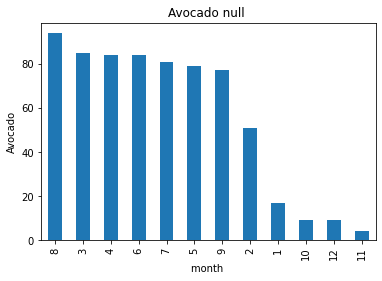

In [18]:
df_missing[df_missing['Avocado A'].isnull()]['month'].value_counts().plot.bar()
plt.title("Avocado null ")
plt.xlabel("month ")
plt.ylabel("Avocado")

Text(0, 0.5, 'Banana ')

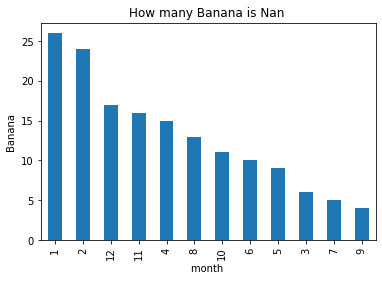

In [43]:
 df_missing[df_missing['Banana A'].isnull()]['month'].value_counts().plot.bar()
plt.title("How many Banana is Nan ")
plt.xlabel("month ")
plt.ylabel("Banana ")

In [19]:
avo_A = p_df1['Avocado A']
avo_B = p_df1['Avocado B']
pmg_A = p_df1['Pomegranate A']
pmg_B = p_df1['Pomegranate B']
oni_A = p_df1['Onion A']
d_dates = p_df1['Date']
missing_val_df = pd.DataFrame({'Date':d_dates,'Avocado A':avo_A,'Avocado B':avo_B,'Pomegranate A':pmg_A,'Pomegranate B':pmg_B,
                              'Onion A':oni_A})

In [20]:
missing_val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 2 to 1871
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1127 non-null   object 
 1   Avocado A      453 non-null    float64
 2   Avocado B      559 non-null    float64
 3   Pomegranate A  581 non-null    float64
 4   Pomegranate B  752 non-null    float64
 5   Onion A        690 non-null    float64
dtypes: float64(5), object(1)
memory usage: 61.6+ KB


In [21]:
p_missing_val_df = missing_val_df.dropna(axis=0, thresh=4).copy()

In [22]:
p_missing_val_df.info()
fill_p_missing_val_df = p_missing_val_df.copy()
colNameArray1 = ['Date','Avocado A','Avocado B','Pomegranate A','Pomegranate B']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 2 to 1871
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           638 non-null    object 
 1   Avocado A      449 non-null    float64
 2   Avocado B      529 non-null    float64
 3   Pomegranate A  518 non-null    float64
 4   Pomegranate B  631 non-null    float64
 5   Onion A        617 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.9+ KB


In [23]:
for i in range(1,len(fill_p_missing_val_df.columns)-1,2):
    A_col = p_missing_val_df[colNameArray1[i]]
    B_col = p_missing_val_df[colNameArray1[i+1]]
    if((A_col.count() > 400)):
        curMean = B_col.mean() - A_col.mean()
        curMean = round(curMean, 2)
        for j in range(0,len(fill_p_missing_val_df)-1):
            if((math.isnan(B_col.iloc[[j]]))):
                fill_p_missing_val_df[colNameArray1[i+1]].iloc[[j]] = A_col.iloc[[j]] + curMean
            else:
                continue
        print(colNameArray1[i])
        print(curMean)

C:\Users\963ga\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Avocado A
3.27
Pomegranate A
2.2


In [24]:
fill_p_missing_val_df1 = fill_p_missing_val_df.copy() 
for i in range(2,len(fill_p_missing_val_df.columns),2):
    A_col = fill_p_missing_val_df[colNameArray1[i-1]]
    B_col = fill_p_missing_val_df[colNameArray1[i]]
    if((B_col.count() > 400)):
        curMean = B_col.mean() - A_col.mean()
        curMean = round(curMean, 2)
        print(colNameArray1[i])
        print(colNameArray1[i-1])
        for j in range(0,len(fill_p_missing_val_df)-1):
            if((math.isnan(A_col.iloc[[j]]))):
                fill_p_missing_val_df1[colNameArray1[i-1]].iloc[[j]] = B_col.iloc[[j]] - curMean
            else:
                continue

Avocado B
Avocado A
Pomegranate B
Pomegranate A


In [25]:
fill_p_missing_val_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 2 to 1871
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           638 non-null    object 
 1   Avocado A      530 non-null    float64
 2   Avocado B      530 non-null    float64
 3   Pomegranate A  632 non-null    float64
 4   Pomegranate B  632 non-null    float64
 5   Onion A        617 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.9+ KB


In [26]:
#missing_val_df.to_csv('p_missing_val_df_chart.csv', index=False)

In [46]:
p_df2

,Date,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,...,Red Cabbage A,Red Cabbage B,Red Pepper A,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B
2,03.01.2016,2.90,3.12,2.70,3.86,4.60,5.10,4.27,7.0,4.70,...,6.00,6.10,8.00,8.10,2.70,NaN,9.10,10.10,6.40,7.50
3,04.01.2016,2.90,3.12,2.70,3.86,4.10,4.40,4.77,7.5,5.00,...,6.00,6.50,8.20,8.80,2.00,NaN,8.19,9.90,6.90,7.30
4,05.01.2016,2.90,3.12,2.60,3.76,3.20,4.40,4.27,7.0,5.00,...,5.90,6.20,6.60,7.90,2.40,NaN,10.00,10.20,7.30,7.50
5,06.01.2016,2.80,3.02,2.90,4.06,3.50,4.00,5.30,6.8,4.40,...,5.50,5.70,7.00,7.60,2.10,NaN,8.00,8.40,7.00,7.10
6,07.01.2016,2.80,3.02,2.80,3.96,3.50,4.90,4.57,7.3,4.40,...,5.40,5.40,4.90,7.70,2.60,NaN,7.70,8.00,6.00,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,2.22,3.49,2.67,4.00,5.89,5.75,5.27,8.0,1.45,...,2.10,4.71,3.17,5.68,3.00,5.0,3.00,4.50,3.00,5.75
1866,21.12.2021,2.00,3.47,2.50,5.00,6.36,6.22,5.27,8.0,1.44,...,2.46,5.07,3.00,5.63,2.95,5.0,2.79,4.50,3.25,6.00
1867,22.12.2021,2.00,3.67,2.50,5.00,6.21,6.07,5.27,8.0,1.34,...,2.50,5.11,3.00,5.86,3.00,5.0,3.00,4.50,3.00,6.06
1868,23.12.2021,2.50,3.31,2.50,5.00,5.92,5.78,5.27,8.0,1.27,...,2.28,4.89,3.70,5.27,2.95,5.0,3.35,5.06,3.38,5.25


In [28]:
df_splitDate = p_df2.copy()


In [29]:
df_splitDate[['day','month','year']] = df_splitDate['Date'].str.split(".", expand = True)
df_splitDate

,Date,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,...,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,day,month,year
2,03.01.2016,2.90,3.12,2.70,3.86,4.60,5.10,4.27,7.0,4.70,...,8.10,2.70,NaN,9.10,10.10,6.40,7.50,03,01,2016
3,04.01.2016,2.90,3.12,2.70,3.86,4.10,4.40,4.77,7.5,5.00,...,8.80,2.00,NaN,8.19,9.90,6.90,7.30,04,01,2016
4,05.01.2016,2.90,3.12,2.60,3.76,3.20,4.40,4.27,7.0,5.00,...,7.90,2.40,NaN,10.00,10.20,7.30,7.50,05,01,2016
5,06.01.2016,2.80,3.02,2.90,4.06,3.50,4.00,5.30,6.8,4.40,...,7.60,2.10,NaN,8.00,8.40,7.00,7.10,06,01,2016
6,07.01.2016,2.80,3.02,2.80,3.96,3.50,4.90,4.57,7.3,4.40,...,7.70,2.60,NaN,7.70,8.00,6.00,6.90,07,01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,2.22,3.49,2.67,4.00,5.89,5.75,5.27,8.0,1.45,...,5.68,3.00,5.0,3.00,4.50,3.00,5.75,20,12,2021
1866,21.12.2021,2.00,3.47,2.50,5.00,6.36,6.22,5.27,8.0,1.44,...,5.63,2.95,5.0,2.79,4.50,3.25,6.00,21,12,2021
1867,22.12.2021,2.00,3.67,2.50,5.00,6.21,6.07,5.27,8.0,1.34,...,5.86,3.00,5.0,3.00,4.50,3.00,6.06,22,12,2021
1868,23.12.2021,2.50,3.31,2.50,5.00,5.92,5.78,5.27,8.0,1.27,...,5.27,2.95,5.0,3.35,5.06,3.38,5.25,23,12,2021


In [30]:
for i in range(1,10):
    df_splitDate['month']=df_splitDate['month'].str.replace("0"+str(i), str(i))
    df_splitDate['day']=df_splitDate['day'].str.replace("0"+str(i), str(i))
    
df_splitDate

,Date,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,...,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,day,month,year
2,03.01.2016,2.90,3.12,2.70,3.86,4.60,5.10,4.27,7.0,4.70,...,8.10,2.70,NaN,9.10,10.10,6.40,7.50,3,1,2016
3,04.01.2016,2.90,3.12,2.70,3.86,4.10,4.40,4.77,7.5,5.00,...,8.80,2.00,NaN,8.19,9.90,6.90,7.30,4,1,2016
4,05.01.2016,2.90,3.12,2.60,3.76,3.20,4.40,4.27,7.0,5.00,...,7.90,2.40,NaN,10.00,10.20,7.30,7.50,5,1,2016
5,06.01.2016,2.80,3.02,2.90,4.06,3.50,4.00,5.30,6.8,4.40,...,7.60,2.10,NaN,8.00,8.40,7.00,7.10,6,1,2016
6,07.01.2016,2.80,3.02,2.80,3.96,3.50,4.90,4.57,7.3,4.40,...,7.70,2.60,NaN,7.70,8.00,6.00,6.90,7,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,2.22,3.49,2.67,4.00,5.89,5.75,5.27,8.0,1.45,...,5.68,3.00,5.0,3.00,4.50,3.00,5.75,20,12,2021
1866,21.12.2021,2.00,3.47,2.50,5.00,6.36,6.22,5.27,8.0,1.44,...,5.63,2.95,5.0,2.79,4.50,3.25,6.00,21,12,2021
1867,22.12.2021,2.00,3.67,2.50,5.00,6.21,6.07,5.27,8.0,1.34,...,5.86,3.00,5.0,3.00,4.50,3.00,6.06,22,12,2021
1868,23.12.2021,2.50,3.31,2.50,5.00,5.92,5.78,5.27,8.0,1.27,...,5.27,2.95,5.0,3.35,5.06,3.38,5.25,23,12,2021


In [31]:
df_splitDate['day'] = df_splitDate['day'].astype(int)
df_splitDate['month'] = df_splitDate['month'].astype(int)
df_splitDate['year'] = df_splitDate['year'].astype(int)


In [32]:
bp = df_splitDate.loc[df_splitDate['month'] == 5].loc[df_splitDate['year'] == 2020].mean()
#df.loc[df['column_name'] == some_value]

In [50]:
df_splitDate

,Date,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,...,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,day,month,year
2,03.01.2016,2.90,3.12,2.70,3.86,4.60,5.10,4.27,7.0,4.70,...,8.10,2.70,NaN,9.10,10.10,6.40,7.50,3,1,2016
3,04.01.2016,2.90,3.12,2.70,3.86,4.10,4.40,4.77,7.5,5.00,...,8.80,2.00,NaN,8.19,9.90,6.90,7.30,4,1,2016
4,05.01.2016,2.90,3.12,2.60,3.76,3.20,4.40,4.27,7.0,5.00,...,7.90,2.40,NaN,10.00,10.20,7.30,7.50,5,1,2016
5,06.01.2016,2.80,3.02,2.90,4.06,3.50,4.00,5.30,6.8,4.40,...,7.60,2.10,NaN,8.00,8.40,7.00,7.10,6,1,2016
6,07.01.2016,2.80,3.02,2.80,3.96,3.50,4.90,4.57,7.3,4.40,...,7.70,2.60,NaN,7.70,8.00,6.00,6.90,7,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,20.12.2021,2.22,3.49,2.67,4.00,5.89,5.75,5.27,8.0,1.45,...,5.68,3.00,5.0,3.00,4.50,3.00,5.75,20,12,2021
1866,21.12.2021,2.00,3.47,2.50,5.00,6.36,6.22,5.27,8.0,1.44,...,5.63,2.95,5.0,2.79,4.50,3.25,6.00,21,12,2021
1867,22.12.2021,2.00,3.67,2.50,5.00,6.21,6.07,5.27,8.0,1.34,...,5.86,3.00,5.0,3.00,4.50,3.00,6.06,22,12,2021
1868,23.12.2021,2.50,3.31,2.50,5.00,5.92,5.78,5.27,8.0,1.27,...,5.27,2.95,5.0,3.35,5.06,3.38,5.25,23,12,2021


In [34]:
bpp = pd.DataFrame()
for i in range(2016,2022):
    for j in range(1,13):
        bp = df_splitDate.loc[df_splitDate['month'] == j].loc[df_splitDate['year'] == i].mean()
        bpp = bpp.append(bp, ignore_index = True)
bpp= bpp.drop("day", axis=1)
bpp

,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,Green Cabbage B,...,Red Pepper A,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,month,year
0,3.861111,4.081111,2.611111,3.771111,3.861111,4.135556,4.798235,6.982353,3.594444,4.846111,...,5.788889,7.294444,2.533333,NaN,5.798333,6.483333,5.683333,6.972222,1.0,2016.0
1,5.146154,5.366154,2.346154,3.506154,4.353846,4.213846,4.029231,6.407692,2.130769,4.400769,...,5.876923,8.023077,2.607692,NaN,2.842308,3.838462,5.213077,7.976923,2.0,2016.0
2,5.766667,5.986667,2.075000,3.235000,3.933333,3.793333,4.015000,6.366667,1.366667,3.636667,...,5.700000,7.600000,2.485455,2.700000,1.653333,2.850000,5.030833,7.891667,3.0,2016.0
3,6.292857,6.512857,1.992857,3.152857,2.807143,2.667143,4.087143,6.792857,0.992857,3.262857,...,4.328571,7.057143,2.057143,2.978571,3.182857,4.864286,4.085714,6.978571,4.0,2016.0
4,6.407692,6.627692,1.969231,3.129231,4.153846,4.013846,4.242308,7.176923,1.323077,3.593077,...,6.315385,9.707692,2.253846,3.046154,2.460769,3.484615,5.653846,8.723077,5.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.416500,5.501500,3.169500,3.756000,4.393500,4.253500,5.770000,8.500000,2.761000,5.031000,...,3.320000,5.910500,3.054706,5.000000,3.051000,5.156500,3.397500,6.231000,8.0,2021.0
68,3.010909,4.595455,3.404545,4.298182,4.192727,4.052727,5.774545,8.504545,4.980909,7.250909,...,4.432727,8.150909,2.763636,5.094444,3.706364,6.062727,4.585455,8.521818,9.0,2021.0
69,2.826667,4.386111,3.122222,3.544444,3.217778,3.077778,5.770000,8.500000,2.294444,4.564444,...,4.371667,6.557222,3.423889,5.051667,3.651667,5.396667,4.524444,7.127222,10.0,2021.0
70,2.421053,3.226316,2.910000,3.490000,4.700526,4.560526,5.732632,8.462632,1.841053,4.111053,...,3.328421,5.550000,3.283158,5.026667,3.035789,4.697895,3.573158,5.626842,11.0,2021.0


In [35]:
data_rains = pd.read_csv ('Rains_Dataframe.csv')

In [36]:
data_rains

,stn_name,rain_code,rain_days_num,rain_max_code,rain_max_val,rain_ttl,year,month
0,REGAVIM ...,0,14,0,64.1,166.3,2016,1
1,KEFAR HAROE ...,0,13,5,21.0,96.8,2016,1
2,ENAT ...,0,12,5,21.3,114.6,2016,1
3,NES ZIYYONA ...,0,10,5,16.5,96.0,2016,1
4,NIZZAN ...,0,11,0,18.8,73.1,2016,1
...,...,...,...,...,...,...,...,...
1321,PARAN ...,0,1,0,0.2,0.2,2021,10
1322,YOTVATA ...,0,1,0,0.3,0.3,2021,10
1323,YONATAN ...,0,4,0,2.7,5.1,2021,10
1324,AVNE ETAN ...,0,4,0,2.6,4.6,2021,10


In [37]:
#rp = data_rains.loc[data_rains['month'] == j].loc[data_rains['year'] == i].mean()

In [38]:
rpp = pd.DataFrame()
for i in range(2016,2022):
    for j in range(1,13):
        rp = data_rains.loc[data_rains['month'] == j].loc[data_rains['year'] == i].mean()
        rpp = rpp.append(rp, ignore_index = True)
rpp

,month,rain_code,rain_days_num,rain_max_code,rain_max_val,rain_ttl,year,stn_name
0,1.0,0.000000,10.142857,0.714286,30.652381,108.157143,2016.0,NaN
1,2.0,0.000000,5.428571,0.476190,33.480952,71.504762,2016.0,NaN
2,3.0,0.761905,7.571429,1.285714,14.571429,32.585714,2016.0,NaN
3,4.0,0.333333,2.904762,1.523810,16.280952,21.333333,2016.0,NaN
4,5.0,1.428571,1.619048,1.476190,1.357143,2.457143,2016.0,NaN
...,...,...,...,...,...,...,...,...
67,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0,NaN
68,9.0,1.105263,0.894737,1.368421,1.000000,1.184211,2021.0,NaN
69,10.0,0.736842,2.684211,1.000000,1.973684,2.800000,2021.0,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
rpp = rpp.drop("stn_name", axis=1)

In [40]:
rpp

,month,rain_code,rain_days_num,rain_max_code,rain_max_val,rain_ttl,year
0,1.0,0.000000,10.142857,0.714286,30.652381,108.157143,2016.0
1,2.0,0.000000,5.428571,0.476190,33.480952,71.504762,2016.0
2,3.0,0.761905,7.571429,1.285714,14.571429,32.585714,2016.0
3,4.0,0.333333,2.904762,1.523810,16.280952,21.333333,2016.0
4,5.0,1.428571,1.619048,1.476190,1.357143,2.457143,2016.0
...,...,...,...,...,...,...,...
67,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,2021.0
68,9.0,1.105263,0.894737,1.368421,1.000000,1.184211,2021.0
69,10.0,0.736842,2.684211,1.000000,1.973684,2.800000,2021.0
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
rains_vegs = bpp.copy()
rains_vegs['rain_days_num'] = rpp['rain_days_num']
rains_vegs['rain_max_code'] = rpp['rain_max_code']
rains_vegs['max_val'] = rpp['rain_max_val']
rains_vegs['rain_ttl'] = rpp['rain_ttl']
rains_vegs

,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,Green Cabbage B,...,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,month,year,rain_days_num,rain_max_code,max_val,rain_ttl
0,3.861111,4.081111,2.611111,3.771111,3.861111,4.135556,4.798235,6.982353,3.594444,4.846111,...,5.798333,6.483333,5.683333,6.972222,1.0,2016.0,10.142857,0.714286,30.652381,108.157143
1,5.146154,5.366154,2.346154,3.506154,4.353846,4.213846,4.029231,6.407692,2.130769,4.400769,...,2.842308,3.838462,5.213077,7.976923,2.0,2016.0,5.428571,0.476190,33.480952,71.504762
2,5.766667,5.986667,2.075000,3.235000,3.933333,3.793333,4.015000,6.366667,1.366667,3.636667,...,1.653333,2.850000,5.030833,7.891667,3.0,2016.0,7.571429,1.285714,14.571429,32.585714
3,6.292857,6.512857,1.992857,3.152857,2.807143,2.667143,4.087143,6.792857,0.992857,3.262857,...,3.182857,4.864286,4.085714,6.978571,4.0,2016.0,2.904762,1.523810,16.280952,21.333333
4,6.407692,6.627692,1.969231,3.129231,4.153846,4.013846,4.242308,7.176923,1.323077,3.593077,...,2.460769,3.484615,5.653846,8.723077,5.0,2016.0,1.619048,1.476190,1.357143,2.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.416500,5.501500,3.169500,3.756000,4.393500,4.253500,5.770000,8.500000,2.761000,5.031000,...,3.051000,5.156500,3.397500,6.231000,8.0,2021.0,0.000000,0.000000,0.000000,0.000000
68,3.010909,4.595455,3.404545,4.298182,4.192727,4.052727,5.774545,8.504545,4.980909,7.250909,...,3.706364,6.062727,4.585455,8.521818,9.0,2021.0,0.894737,1.368421,1.000000,1.184211
69,2.826667,4.386111,3.122222,3.544444,3.217778,3.077778,5.770000,8.500000,2.294444,4.564444,...,3.651667,5.396667,4.524444,7.127222,10.0,2021.0,2.684211,1.000000,1.973684,2.800000
70,2.421053,3.226316,2.910000,3.490000,4.700526,4.560526,5.732632,8.462632,1.841053,4.111053,...,3.035789,4.697895,3.573158,5.626842,11.0,2021.0,NaN,NaN,NaN,NaN


In [42]:
rains_vegs.to_csv('rains_vegs.csv', index=False)